In [224]:
import numpy as np
import matplotlib.pyplot as plt
import gym

# Q-Learning

In [216]:
env = gym.make('FrozenLake-v1', is_slippery=False)

In [217]:
nS = env.observation_space.n
nA = env.action_space.n

In [218]:
gamma = 0.9
alpha = 0.9
eps = 1.0
eps_decay = 0.99995

In [219]:
max_episodes = 50000
max_steps = 20

In [220]:
def select_action(Q, s, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(nA)
    return np.argmax(Q[s, :])

In [221]:
Rs = []
Eps = []
Q = np.zeros((nS, nA))
for episode in range(max_episodes):
    s, _ = env.reset()
    R = 0
    for step in range(max_steps):
        a = select_action(Q, s, eps)
        s_prime, r, done, _, _ = env.step(a)
        
        R += r
        Q[s, a] += alpha*(r + gamma*np.max(Q[s_prime, :]) - Q[s, a])

        if done:
            break
            
        s = s_prime
        eps *= eps_decay
    Rs.append(R)
    Eps.append(eps)

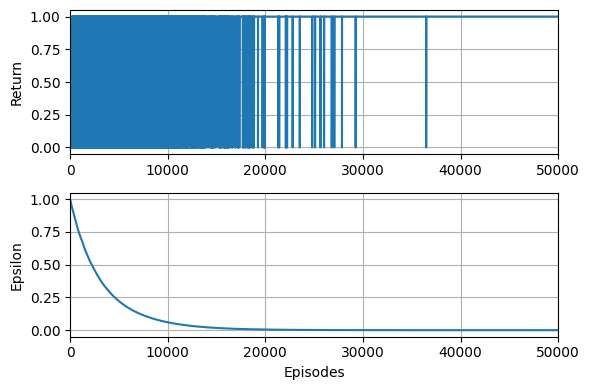

In [222]:
fig, axes = plt.subplots(2, 1, figsize=(6, 4))
axes = axes.flatten()
axes[0].plot(Rs)
axes[0].set_xlim(0, max_episodes)
axes[0].grid()
axes[0].set_ylabel("Return")
axes[1].plot(Eps)
axes[1].set_xlim(0, max_episodes)
axes[1].grid()
axes[1].set_xlabel("Episodes")
axes[1].set_ylabel("Epsilon")
plt.tight_layout()
plt.show()

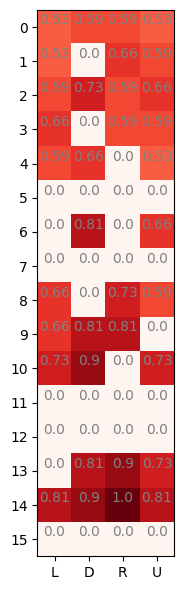

In [223]:
plt.figure(figsize=(16, 6))
plt.imshow(Q, cmap='Reds')
for i in range(nS):
    for j in range(nA):
        q = np.around(Q[i, j], 2)
        plt.text(j, i, q, ha='center', va='bottom', color='gray')
plt.yticks(np.arange(nS), np.arange(nS))
plt.xticks(np.arange(nA), ['L', 'D', 'R', 'U'])
plt.tight_layout()
plt.show()